In [2]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [8]:
vi=pd.read_csv('D:/vi calculation/vi data all.csv',encoding='utf-8')

In [9]:
vi['BookDate'] = pd.to_datetime(vi['BookDate'])
vi['CheckIn'] = pd.to_datetime(vi['CheckIn'])
vi_cum = vi.groupby('BookDate').first()
vi_cum = vi_cum[vi_cum.columns[2:44]].cumsum(axis=0)
vi_cum.head()
vi = vi.drop(vi_cum.columns,axis = 1)
vi_cum = vi_cum.reset_index()
vi = pd.merge(vi,vi_cum,how='inner',on='BookDate')
vi.head()

,BookDate,CheckIn,BookingWindow,decay_ooking.com_Days Inn Port Angele_ss,decay_ooking.com_Holiday Inn Express _ss,decay_ooking.com_Olympic Lodge_ss,decay_ooking.com_Quality Inn & Suites_ss,decay_ooking.com_Quality Inn Uptown_ss,decay_ooking.com_Red Lion Hotel Port _ss,decay_ooking.com_Super 8 Port Angeles_ss,...,ravelocity.com_Days Inn Port An_rc,ravelocity.com_Econo Lodge Seq_rc,ravelocity.com_Red Lion Hotel P_rc,ravelocity.com_Super 8 Port Ang_rc,ripadvisor.com_Days Inn Port An_rc,ripadvisor.com_Econo Lodge Seq_rc,ripadvisor.com_Olympic Lodge_rc,ripadvisor.com_Quality Inn Upto_rc,ripadvisor.com_Red Lion Hotel P_rc,ripadvisor.com_Super 8 Port Ang_rc
0,2014-04-21,2014-07-06,76,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,...,0,0,0,0,0,0,1,0,0,0
1,2014-04-21,2014-07-16,86,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,...,0,0,0,0,0,0,1,0,0,0
2,2014-04-21,2014-07-02,72,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,...,0,0,0,0,0,0,1,0,0,0
3,2014-04-21,2014-07-04,74,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,...,0,0,0,0,0,0,1,0,0,0
4,2014-04-21,2014-07-18,88,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,...,0,0,0,0,0,0,1,0,0,0


In [190]:
list(vi.columns)

[u'BookDate',
 u'CheckIn',
 u'BookingWindow',
 u'decay_ooking.com_Days Inn Port Angele_ss',
 u'decay_ooking.com_Holiday Inn Express _ss',
 u'decay_ooking.com_Olympic Lodge_ss',
 u'decay_ooking.com_Quality Inn & Suites_ss',
 u'decay_ooking.com_Quality Inn Uptown_ss',
 u'decay_ooking.com_Red Lion Hotel Port _ss',
 u'decay_ooking.com_Super 8 Port Angeles_ss',
 u'decay_ripadvisor.com_Days Inn Port An_ss',
 u'decay_ripadvisor.com_Econo Lodge  Seq_ss',
 u'decay_ripadvisor.com_Olympic Lodge_ss',
 u'decay_ripadvisor.com_Quality Inn Upto_ss',
 u'decay_ripadvisor.com_Red Lion Hotel P_ss',
 u'decay_ripadvisor.com_Super 8 Port Ang_ss',
 u'decay_acebook_Econo Lodge  Sequim_ss',
 u'decay_acebook_Olympic Lodge_ss',
 u'decay_acebook_Quality Inn & Suites Se_ss',
 u'decay_acebook_Quality Inn Uptown_ss',
 u'decay_acebook_Red Lion Hotel Port Ang_ss',
 u'decay_rbitz.com_Days Inn Port Angeles_ss',
 u'decay_rbitz.com_Econo Lodge  Sequim_ss',
 u'decay_rbitz.com_Holiday Inn Express H_ss',
 u'decay_rbitz.com_Qu

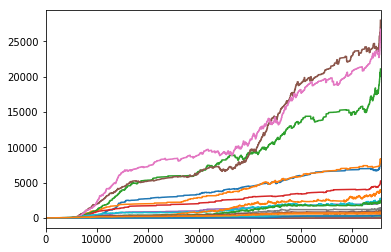

In [10]:
#map(str.strip, list(vi_cum.columns[1:len(vi_cum.columns)]))
cols = [s for s in vi.columns if "decay_" in s]
#print(cols)
for col in cols:
    temp_col = str(col).replace('decay_','').replace('_ss','')
    vi['{}_mul'.format(temp_col)] = vi[col].mul(vi[temp_col+'_rc'])
    vi['{}_mul'.format(temp_col)].plot()

In [11]:
hotel_name = '_Red Lion Hotel '
sub_col = ['BookDate','CheckIn','BookingWindow']
sub_col.extend([s for s in vi.columns if (hotel_name in s) and ('_mul' in s)])

for col in sub_col[3:]:
    temp_col = str(col).replace('_mul','')
    vi['{}_sub'.format(temp_col)] = vi[col].div(vi[temp_col+'_rc'])

In [12]:
vi.iloc[:,60:70]
vi = vi.fillna(0,limit=1)

In [13]:
vi.fillna(method='ffill',inplace=True)

In [14]:
sub_col = ['BookDate','CheckIn','BookingWindow']
sub_col.extend([s for s in vi.columns if (hotel_name in s) and ('_sub' in s)])
vi['{}_vi'.format(hotel_name)] = vi[sub_col[3:]].sum(axis=1)

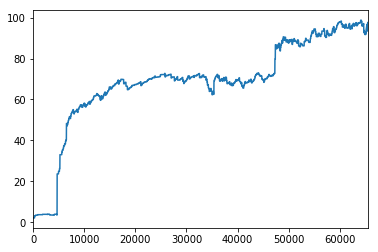

In [15]:
vi['_Red Lion Hotel _vi'].plot()

In [16]:
sub_col = ['BookDate','CheckIn','BookingWindow']
sub_col.extend([s for s in vi.columns if (hotel_name in s) and ( 'decay_' in s)])

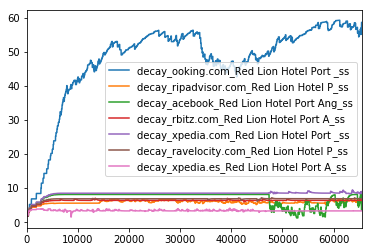

In [17]:
vi[sub_col[3:]].plot()

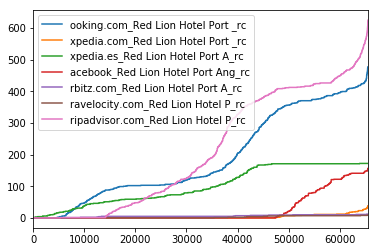

In [18]:
sub_col= [s for s in vi.columns if (hotel_name in s) and ( 'rc' in s)]
vi[sub_col].plot()

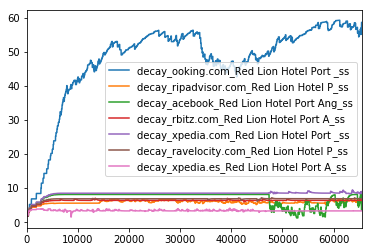

In [19]:
sub_col= [s for s in vi.columns if (hotel_name in s) and ( 'ss' in s)]
vi[sub_col].plot()

In [20]:
sub_col= [s for s in vi.columns if (hotel_name in s)]
vi[sub_col[5:]].head(1)

,decay_ravelocity.com_Red Lion Hotel P_ss,decay_xpedia.es_Red Lion Hotel Port A_ss,ooking.com_Red Lion Hotel Port _rc,xpedia.com_Red Lion Hotel Port _rc,xpedia.es_Red Lion Hotel Port A_rc,acebook_Red Lion Hotel Port Ang_rc,rbitz.com_Red Lion Hotel Port A_rc,ravelocity.com_Red Lion Hotel P_rc,ripadvisor.com_Red Lion Hotel P_rc,ooking.com_Red Lion Hotel Port _mul,...,ravelocity.com_Red Lion Hotel P_mul,xpedia.es_Red Lion Hotel Port A_mul,ooking.com_Red Lion Hotel Port _sub,ripadvisor.com_Red Lion Hotel P_sub,acebook_Red Lion Hotel Port Ang_sub,rbitz.com_Red Lion Hotel Port A_sub,xpedia.com_Red Lion Hotel Port _sub,ravelocity.com_Red Lion Hotel P_sub,xpedia.es_Red Lion Hotel Port A_sub,_Red Lion Hotel _vi
0,1.791759,2.110213,0,0,1,0,0,0,0,0.0,...,0.0,2.110213,0.0,0.0,0.0,0.0,0.0,0.0,2.110213,2.110213


In [21]:
pricing = pd.read_csv('D://vi calculation/subscriber rate.csv',encoding='utf-8')
pricing['Book Date'] = pd.to_datetime(pricing['Book Date'])
pricing['CheckIn Date'] = pd.to_datetime(pricing['CheckIn Date'])

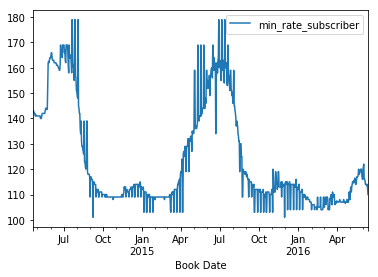

In [89]:
import numpy as np
pricing.groupby('Book Date').agg({'min_rate_subscriber':np.median}).plot()

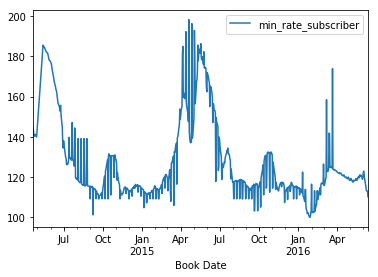

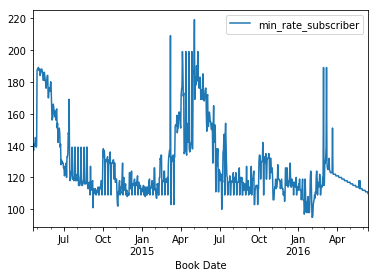

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = pd.merge(pricing,pricing.groupby('Book Date')['CheckIn Date'].apply(
        lambda grp: grp.nlargest(15)).reset_index().drop('level_1',axis=1),
         how='inner',on = ['Book Date','CheckIn Date']).groupby('Book Date').agg(
    {'min_rate_subscriber':np.mean})
series2 = pd.merge(pricing,pricing.groupby('Book Date')['CheckIn Date'].apply(
        lambda grp: grp.nlargest(1)).reset_index().drop('level_1',axis=1),
         how='inner',on = ['Book Date','CheckIn Date']).groupby('Book Date').agg(
    {'min_rate_subscriber':np.median})
#result = seasonal_decompose(series, model='additive')
#result.plot()
series.plot()
series2.plot()

In [76]:
import matplotlib.pyplot as plt
for bd in pd.unique(pricing.loc[pricing['CheckIn Date'].dt.year==2014,'CheckIn Date']):
    pass
    #pd.ewma(pricing.loc[pricing['Book Date']==bd,'min_rate_subscriber'],com = 2).mean()
    #plt.plot(pricing.loc[pricing['CheckIn Date']==bd,'min_rate_subscriber'].reset_index().drop('index',axis=1),)

In [155]:
series = series.reset_index()

In [156]:
series.rename(columns={'Book Date': 'BookDate'},inplace=True)

In [180]:
vi_bd = vi.drop(['CheckIn','BookingWindow'],axis=1).drop_duplicates()

In [181]:
final_df = pd.merge(vi_bd,series,how='inner',on='BookDate')[['BookDate','min_rate_subscriber','_Red Lion Hotel _vi']]

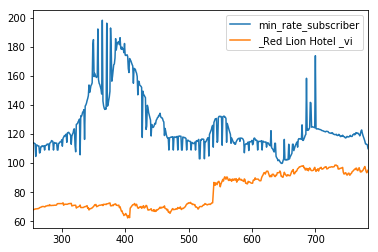

In [182]:
final_df.loc[final_df['BookDate'].dt.year!=2014].plot()

In [187]:
final_df.loc[final_df['BookDate']>='2015-08-01'].corr()

,min_rate_subscriber,_Red Lion Hotel _vi
min_rate_subscriber,1.000000,0.133265
_Red Lion Hotel _vi,0.133265,1.000000


In [188]:
final_df.to_csv('vi_rate_corr.csv',index=False)

In [189]:
final_df.shape

(784, 3)